In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Convolutional neural networks

In class, we have briefly reviewed the idea of learning good features directly from data and went through the concept of convolutional neural networks along with few architectures.

Until recently, building convolutional neural networks was tough. There was no high-level tools for that, you would be required to understand all the internal mechanics of the model and its operations.

Today, due to the high-level tools such as Keras and TensorFlow, everybody can build a convolutional neural network and put it to work without diving deep into them. What used to be a one-month project became a few hours exercise.


In [14]:
import pickle
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.backend import tf as ktf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Lambda
from keras.layers import Flatten

from keras.optimizers import SGD

from keras.utils import np_utils

## Loading the images

In [3]:
train_images, train_labels = pickle.load(open('data/train_set_all.pkl', 'rb'))
cv_images, cv_labels = pickle.load(open('data/test_set_all.pkl', 'rb'))

train_images = np.array(train_images)
train_labels = np_utils.to_categorical(np.array(train_labels), 10)

cv_images = np.array(cv_images)
cv_labels = np_utils.to_categorical(np.array(cv_labels), 10)

In [4]:
print(train_images.shape)
print(len(train_labels))

(50000, 32, 32, 3)
50000


In [5]:
print(cv_images.shape)
print(len(cv_labels))

(10000, 32, 32, 3)
10000


In [6]:
print(train_labels[0:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [7]:
def show_image(np_array):
    %matplotlib inline
    plt.figure()
    plt.imshow(np_array)

In [8]:
def show_example(data_set, labels, example_index):
    show_image(data_set[example_index])
    print('Label: ', labels[example_index])

Label:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


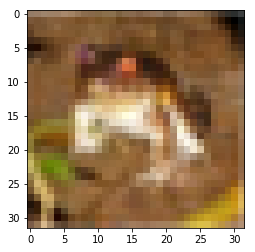

In [9]:
show_example(train_images, train_labels, example_index = 0)

Label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


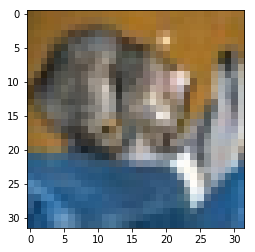

In [10]:
show_example(cv_images, cv_labels, example_index = 0)

## Building AlexNet

In 2012 a convolutional neural network called AlexNet won ImageNet competition. 

Go through an [original AlexNet paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) to investigate the architecture. Next, investigate the [basics of Keras](https://keras.io/#keras-the-python-deep-learning-library). We will use it with TensorFlow backend.

You are also encouraged to go through some CNN tutorial for Keras. There is a number of them online (for example, [this](https://elitedatascience.com/keras-tutorial-deep-learning-in-python) or [this](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)).
Now, build AlexNex network with Keras for object recognition. Note that standard AlexNet works with 224x224 input images. The dataset you are going to use for this problem is 32x32.

In [34]:
model = Sequential()

# Layer 0
# resize images to have the same input as in the AlexNet
model.add(Lambda(lambda image: ktf.image.resize_images(image, (54, 54)), input_shape=(32,32,3)))

# AlexNet layers description here: https://sushscience.wordpress.com/2016/12/04/understanding-alexnet/
# Keras layers docs: https://keras.io/layers/core/

# Layer 1
model.add(Conv2D(filters=48, kernel_size=(5,5), strides=4, activation='relu', padding='same'))

# Layer 2
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'))

# Layer 3
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding='same'))

# Layer 4
model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding='same'))

# Layer 5
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

# Layer 6
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))

# Layer 7
model.add(Dense(256, activation = 'relu'))

# Layer 8
model.add(Dense(10, activation = 'softmax'))

print(model.summary())

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_15 (Lambda)           (None, 54, 54, 3)         0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 14, 14, 48)        3648      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 7, 7, 48)          0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 7, 7, 64)          76864     
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 7, 7, 96)          55392     
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 7, 7, 96)          83040     
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 7, 7, 64)          55360     
__________

## Training AlexNet

Use training set for training the network to recognize objects. You might want to use RMSProp optimizer to speed up the training.

Convolutional networks require a lot of computing power for training. Typical setup for training CNN is to use GPU, however, in this problem you are not required to do so. CPU will be fine as well.

If you are using CPU for this subproblem, training process might be slow. You can stop it manually as soon as you get meaningful results.

Report the results on the training and cross-validation sets. The report should contain the training logs.

In [35]:
model.fit(train_images, train_labels, batch_size=64, epochs=100, initial_epoch=0, verbose=1, validation_data=(cv_images, cv_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 57s 1ms/step - loss: 1.7868 - acc: 0.3688 - val_loss: 1.6963 - val_acc: 0.3892
Epoch 2/100
50000/50000 [==============================] - 55s 1ms/step - loss: 1.4104 - acc: 0.4937 - val_loss: 1.3685 - val_acc: 0.5194
Epoch 3/100
50000/50000 [==============================] - 52s 1ms/step - loss: 1.2765 - acc: 0.5459 - val_loss: 1.2295 - val_acc: 0.5549
Epoch 4/100
50000/50000 [==============================] - 52s 1ms/step - loss: 1.1986 - acc: 0.5715 - val_loss: 1.2725 - val_acc: 0.5506
Epoch 5/100
50000/50000 [==============================] - 52s 1ms/step - loss: 1.1340 - acc: 0.5957 - val_loss: 1.1865 - val_acc: 0.5838
Epoch 6/100
50000/50000 [==============================] - 52s 1ms/step - loss: 1.0798 - acc: 0.6158 - val_loss: 1.1829 - val_acc: 0.5864
Epoch 7/100
50000/50000 [==============================] - 53s 1ms/step - loss: 1.0261 - acc: 0.6343 - val_loss: 1.1991 - 

50000/50000 [==============================] - 55s 1ms/step - loss: 0.2710 - acc: 0.9191 - val_loss: 2.0351 - val_acc: 0.6064
Epoch 60/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.2485 - acc: 0.9255 - val_loss: 2.1377 - val_acc: 0.5988
Epoch 61/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.2480 - acc: 0.9280 - val_loss: 2.2210 - val_acc: 0.6005
Epoch 62/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.2517 - acc: 0.9265 - val_loss: 2.1621 - val_acc: 0.6025
Epoch 63/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.2463 - acc: 0.9280 - val_loss: 2.1536 - val_acc: 0.5987
Epoch 64/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.2693 - acc: 0.9228 - val_loss: 2.0605 - val_acc: 0.6079
Epoch 65/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.2677 - acc: 0.9225 - val_loss: 2.0601 - val_acc: 0.6023
Epoch 66/100
50000/50000 [==============

In [51]:
# save and load models: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

def save_model(model, model_name):
    # serialize model to JSON
    model_json = model.to_json()
    with open(model_name + ".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(model_name + ".h5")
    print('Saved', model_name, 'to disk')

In [52]:
save_model(model, 'model')

Saved model to disk


### Summary
The best accuracy on the test set is 0.6167 (epoch 33).

## Improving AlexNet

As you can see, AlexNet does not work very well on such a small dataset. Recall what you have learned from this class to improve its performance. You can also take a look at the [Dropout technique](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) and its [implementation in Keras](https://keras.io/layers/core/#dropout). 

In [49]:
dropout_model = Sequential()

# Layer 0
# resize images to have the same input as in the AlexNet
dropout_model.add(Lambda(lambda image: ktf.image.resize_images(image, (54, 54)), input_shape=(32,32,3)))

# AlexNet layers description here: https://sushscience.wordpress.com/2016/12/04/understanding-alexnet/
# Keras layers docs: https://keras.io/layers/core/

# Layer 1
dropout_model.add(Conv2D(filters=48, kernel_size=(5,5), strides=4, activation='relu', padding='same'))

# Layer 2
dropout_model.add(MaxPooling2D(pool_size=(2,2)))
dropout_model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'))

# Layer 3
# model.add(MaxPooling2D(pool_size=(2,2)))
dropout_model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding='same'))

# Layer 4
dropout_model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding='same'))

# Layer 5
dropout_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

# Layer 6
dropout_model.add(MaxPooling2D(pool_size=(2,2)))
dropout_model.add(Flatten())
dropout_model.add(Dense(256, activation = 'relu'))
# dropout_model.add(Dropout(0.2))

# Layer 7
dropout_model.add(Dense(256, activation = 'relu'))
dropout_model.add(Dropout(0.2))

# Layer 8
dropout_model.add(Dense(10, activation = 'softmax'))

print(dropout_model.summary())

dropout_model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_20 (Lambda)           (None, 54, 54, 3)         0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 14, 14, 48)        3648      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 7, 7, 48)          0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 7, 7, 64)          76864     
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 7, 7, 96)          55392     
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 7, 7, 96)          83040     
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 7, 7, 64)          55360     
__________

In [50]:
dropout_model.fit(train_images, train_labels, batch_size=64, epochs=100, initial_epoch=0, verbose=1, validation_data=(cv_images, cv_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 61s 1ms/step - loss: 1.7930 - acc: 0.3617 - val_loss: 1.4552 - val_acc: 0.4692
Epoch 2/100
50000/50000 [==============================] - 59s 1ms/step - loss: 1.4343 - acc: 0.4839 - val_loss: 1.3932 - val_acc: 0.4884
Epoch 3/100
50000/50000 [==============================] - 60s 1ms/step - loss: 1.3213 - acc: 0.5272 - val_loss: 1.3251 - val_acc: 0.5292
Epoch 4/100
50000/50000 [==============================] - 59s 1ms/step - loss: 1.2534 - acc: 0.5543 - val_loss: 1.2263 - val_acc: 0.5595
Epoch 5/100
50000/50000 [==============================] - 60s 1ms/step - loss: 1.1836 - acc: 0.5794 - val_loss: 1.2149 - val_acc: 0.5679
Epoch 6/100
50000/50000 [==============================] - 60s 1ms/step - loss: 1.1372 - acc: 0.5971 - val_loss: 1.1677 - val_acc: 0.5844
Epoch 7/100
50000/50000 [==============================] - 61s 1ms/step - loss: 1.0961 - acc: 0.6109 - val_loss: 1.1771 - 

50000/50000 [==============================] - 53s 1ms/step - loss: 0.4578 - acc: 0.8534 - val_loss: 1.9730 - val_acc: 0.5959
Epoch 60/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.4506 - acc: 0.8571 - val_loss: 1.8886 - val_acc: 0.5957
Epoch 61/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.4339 - acc: 0.8629 - val_loss: 2.0158 - val_acc: 0.5975
Epoch 62/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.4656 - acc: 0.8545 - val_loss: 1.9233 - val_acc: 0.6050
Epoch 63/100
50000/50000 [==============================] - 51s 1ms/step - loss: 0.4385 - acc: 0.8625 - val_loss: 1.9096 - val_acc: 0.6022
Epoch 64/100
50000/50000 [==============================] - 51s 1ms/step - loss: 0.4548 - acc: 0.8594 - val_loss: 2.0304 - val_acc: 0.6035
Epoch 65/100
50000/50000 [==============================] - 52s 1ms/step - loss: 0.4750 - acc: 0.8521 - val_loss: 1.9239 - val_acc: 0.5965
Epoch 66/100
50000/50000 [==============

In [53]:
save_model(dropout_model, 'dropout_model')

Saved dropout_model to disk


### Summary
The best accuracy on the test set is 0.6199 (epoch 27).